Step 1: Clustering the timeseries into brain states
----------------------

To discover main brain states existing in time-series we performed 500 repetitions of $k$-means clustering from $k$ = 2 to $k$ = 18 using Euclidean distance as a measure of similarity. 

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import os

# Loading concatenated timeseries
X = np.load("./data/neuroimaging/timeseries_concat_all_schaefer400.npy")[:100]

# Setup
label= "schaefer400"
k_min = 2
k_max = 18
n_jobs = 2
n_init = 10

# K-means clustering
K = range(k_min, k_max+1)
kmeans_model = [KMeans(n_clusters=k, n_init=10, random_state=1234, n_jobs=n_jobs).fit(X) for k in K]

np.save("./data/neuroimaging/kmeans_schaefer400.npy", kmeans_model)

Step 2: Selecting number of clusters
--------------------------------------------

To identify the optimal number of clusters we use silhouette score.

Text(0, 0.5, 'Within-cluster sum-of-squares')

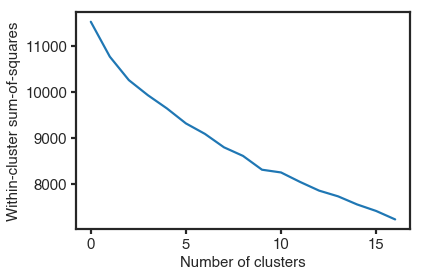

In [50]:
from brain_states.figures import get_seaborn_slyle
get_seaborn_slyle(font_size = 15, line_width = 2.2)

total_wss = [cent.inertia_ for cent in kmeans_model]
silhouette = [silhouette_score(X, lab.labels_, metric='euclidean', sample_size=10) for lab in kmeans_model]

# Within-cluster sum-of-squares
plt.plot(total_wss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum-of-squares')

Text(0, 0.5, 'Silhouette score')

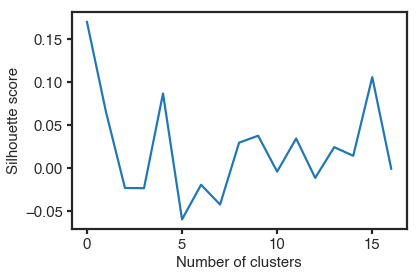

In [51]:
# Plotting Silhouette score
plt.plot(silhouette)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')